<a href="https://colab.research.google.com/github/bd-hedstrom/food-sales-predictions_Hedstrom/blob/main/PROJECT_Sales_Predictions_Hedstrom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [206]:
filename = '/content/sales_predictions.csv'
raw_sales_data = pd.read_csv(filename)
raw_sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [207]:
#Part II 
#1.)How many rows and columns?
# Answer: 12 columns, 8523 rows
raw_sales_data.shape

(8523, 12)

In [208]:
#2.)What are the datatypes of each variable?
# Answer: object, float64, int64
raw_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [209]:
#3.)Are there duplicates? If so, drop any duplicates.
# Answer: There were seemingly no duplicates as the row count didnt change.
raw_sales_data = raw_sales_data.drop_duplicates()
print(raw_sales_data)

     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]


In [210]:
#4.) Identify missing values.
#Outlet_Size and Item_Weight are missing values as the non-null value for both 
# were below 8523 compared to the other values.
average_weight = raw_sales_data['Item_Weight'].mean()


#5.) Decide on how to address the missing values and do it! (This requires your 
#judgement, so explain your choice).
# Medium is a safe bet to assume as its between High and Low
# Average weight to fill in the missing data wont skew the aggregate item weight 
#low or high
raw_sales_data['Outlet_Size'] = raw_sales_data['Outlet_Size'].fillna('Medium')
raw_sales_data['Item_Weight'] = raw_sales_data['Item_Weight'].fillna(average_weight)

print(raw_sales_data)

#6.) Confirm that there are no missing values after addressing them.
#Answer: The number of non-nulls is now consistent for each column
raw_sales_data.isna().sum()

     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [211]:
#.7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
raw_sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [212]:
#I was able to rename the redundant values (LF, low fat, reg) and put them under a uniform category
raw_sales_data = raw_sales_data.replace({'LF':'Low Fat','low fat' : 'Low Fat','reg':'Regular'})

In [213]:
#8.) For any numerical columns, obtain the summary statistics of each (min, max, mean)

print('Item_Weight Stats:')
print('Mean', raw_sales_data['Item_Weight'].mean())
print('Max', raw_sales_data['Item_Weight'].max())
print('Min', raw_sales_data['Item_Weight'].min())

print('Item_Visibility Stats:')
print('Mean',raw_sales_data['Item_Visibility'].mean())
print('Max', raw_sales_data['Item_Visibility'].max())
print('Min', raw_sales_data['Item_Visibility'].min())

print('Item_MRP Stats:')
print('Mean',raw_sales_data['Item_MRP'].mean())
print('Max', raw_sales_data['Item_MRP'].max())
print('Min', raw_sales_data['Item_MRP'].min())

print('Outlet_Establishment_Year Stats:')
print('Mean',raw_sales_data['Outlet_Establishment_Year'].mean())
print('Max', raw_sales_data['Outlet_Establishment_Year'].max())
print('Min', raw_sales_data['Outlet_Establishment_Year'].min())

print('Item_Outlet_Sales Stats:')
print('Mean',raw_sales_data['Item_Outlet_Sales'].mean())
print('Max', raw_sales_data['Item_Outlet_Sales'].max())
print('Min', raw_sales_data['Item_Outlet_Sales'].min())

Item_Weight Stats:
Mean 12.857645184136409
Max 21.35
Min 4.555
Item_Visibility Stats:
Mean 0.06613202877895127
Max 0.328390948
Min 0.0
Item_MRP Stats:
Mean 140.9927819781768
Max 266.8884
Min 31.29
Outlet_Establishment_Year Stats:
Mean 1997.8318667135984
Max 2009
Min 1985
Item_Outlet_Sales Stats:
Mean 2181.2889135750365
Max 13086.9648
Min 33.29


In [214]:
raw_sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


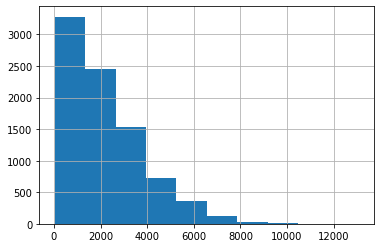

In [215]:
raw_sales_data['Item_Outlet_Sales'].hist();

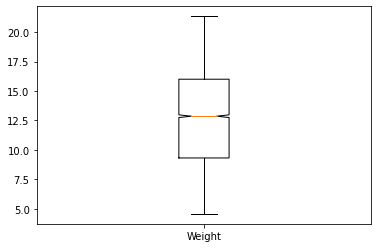

In [216]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot([raw_sales_data['Item_Weight']], notch = True, labels=['Weight']);

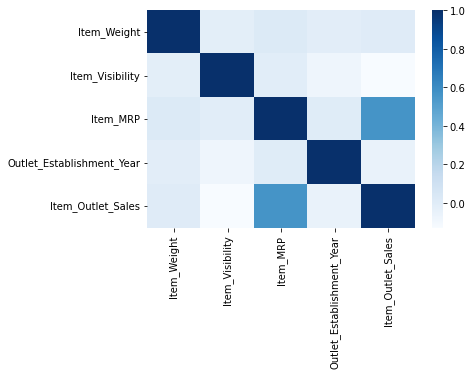

In [217]:
corr = raw_sales_data.corr()
sns.heatmap(corr,cmap='Blues');

In [218]:
LowFatFood_Filter = raw_sales_data['Item_Fat_Content'] == 'Low Fat'
RegularFat_Filter = raw_sales_data['Item_Fat_Content'] == 'Regular'

print(LowFatFood_Filter)

0        True
1       False
2        True
3       False
4        True
        ...  
8518     True
8519    False
8520     True
8521    False
8522     True
Name: Item_Fat_Content, Length: 8523, dtype: bool


In [219]:
low_fat_food_dataframe = raw_sales_data.loc[LowFatFood_Filter]
print(low_fat_food_dataframe)

     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15     9.300000  ...  Supermarket Type1          3735.1380
2              FDN15    17.500000  ...  Supermarket Type1          2097.2700
4              NCD19     8.930000  ...  Supermarket Type1           994.7052
7              FDP10    12.857645  ...  Supermarket Type3          4022.7636
10             FDY07    11.800000  ...  Supermarket Type1          1516.0266
...              ...          ...  ...                ...                ...
8515           FDH24    20.700000  ...  Supermarket Type2          1571.2880
8516           NCJ19    18.600000  ...  Supermarket Type2           858.8820
8518           FDF22     6.865000  ...  Supermarket Type1          2778.3834
8520           NCJ29    10.600000  ...  Supermarket Type1          1193.1136
8522           DRG01    14.800000  ...  Supermarket Type1           765.6700

[5517 rows x 12 columns]


In [220]:
low_fat_food_index = low_fat_food_dataframe.index
print(low_fat_food_index)

Int64Index([   0,    2,    4,    7,   10,   14,   16,   18,   19,   22,
            ...
            8504, 8506, 8509, 8511, 8512, 8515, 8516, 8518, 8520, 8522],
           dtype='int64', length=5517)


In [221]:
low_fat_food_count = len(low_fat_food_index)
print(low_fat_food_count)

5517


In [222]:
LowFat_Count = len(raw_sales_data.loc[LowFatFood_Filter].index)
LowFat_Count

5517

In [223]:
RegularFood_Count = len(raw_sales_data.loc[RegularFat_Filter].index)
RegularFood_Count

3006

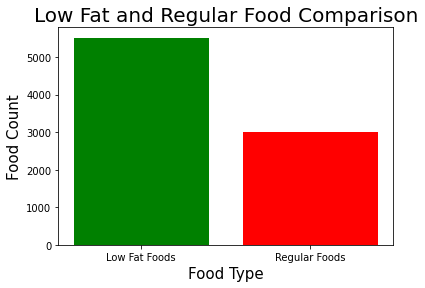

In [224]:
labels = ['Low Fat Foods','Regular Foods']
plt.bar(labels,[LowFat_Count,RegularFood_Count],color=['g','r']);
plt.title('Low Fat and Regular Food Comparison',fontsize=20);
plt.xlabel('Food Type',fontsize=15);
plt.ylabel('Food Count',fontsize=15);
#The graph below illustrates the diversity of foods given their fat content. We can communicate to the interested party that their stock is more appealing because there are more low fat foods.



In [225]:
FruitVeg_Filter = raw_sales_data ['Item_Type'] == 'Fruits and Vegetables'
Meat_Filter = raw_sales_data ['Item_Type'] == 'Meat'

In [226]:
FruitVeg_Dataframe = raw_sales_data.loc[FruitVeg_Filter]
Meat_Dataframe = raw_sales_data.loc[Meat_Filter]

In [227]:
FruitVeg_Count = len(raw_sales_data.loc[FruitVeg_Filter].index)
print(FruitVeg_Count)
Meat_Count = len(raw_sales_data.loc[Meat_Filter].index)
print(Meat_Count)

1232
425


Text(0, 0.5, 'Food Count')

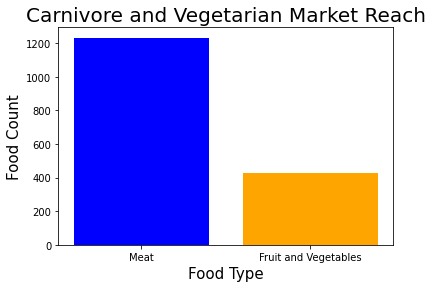

In [228]:
labels = ['Meat','Fruit and Vegetables']
plt.bar(labels, [FruitVeg_Count,Meat_Count],color=['b','orange']);
plt.title('Carnivore and Vegetarian Market Reach',fontsize=20)
plt.xlabel('Food Type',fontsize=15)
plt.ylabel('Food Count', fontsize=15)

In [229]:
#The graph above illuminates to the interested party the degree of which our product is composed of products that specifically appeal to those who consume meat compared to that which appeals to those who choose to eat strictly fruits and vegetables.

## Final

Decision Tree

In [230]:
raw_sales_data['Item_Fat_Content'] = raw_sales_data['Item_Fat_Content'].replace({'Low Fat': 0, 'Regular': 1,})

In [231]:
raw_sales_data['Item_Fat_Content'].value_counts(normalize = True)

0    0.647307
1    0.352693
Name: Item_Fat_Content, dtype: float64

In [232]:
X = raw_sales_data.drop(columns = ['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
y = raw_sales_data['Item_Fat_Content']

In [233]:
#Removed Columns as the data type did not have a significant impact on the process at hand

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [235]:
dec_tree = DecisionTreeClassifier(random_state =42)

In [236]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [237]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [238]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.8071328015016425


Bagged Tree

In [239]:
bagreg = BaggingRegressor(random_state = 42)
bagreg

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [240]:
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [241]:
bagreg.predict(X_test)

array([0. , 0.6, 0.2, ..., 0.3, 0. , 0.2])

In [242]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.892845601212424
0.3901563196946719


Random Tree Model

In [245]:
rf = RandomForestRegressor(random_state = 42)
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [246]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [247]:
rf.predict(X_test)

array([0.31, 0.37, 0.45, ..., 0.16, 0.  , 0.3 ])

In [248]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9259223389908761
0.4617846947106713


Decision Tree: 0.8071328015016425

Bagged Tree: 0.3901563196946719

Random Forest Regressor: 0.4617846947106713

Based off of the performance of the three models, the Decision Tree had the most accurate result, which would be my most recommended model. 